# Deep Learning Task : Predicts The Dialect Given The Text

> Data Pre-processing steps :

1. Importing The Libraries
2. Importing The Dataset
3. Missing Data
4. Clean The Data

  *   Remove Stopwords
  *   Remove Punctuations
  *   Removing URLs
  *   Remove White spaces
  *   Removal of emojis
  *   Removal of HTML tags
  *   Most Common Words
  * Removal of Frequent words

5. Encoding categorical data
6. Vectorizer [ TF / IDF ]
7. Splitting the dataset into the Training set and Test set

> There are some other pre-processing steps that will not be used that we will talk about in documentation the article and why they were not used in the task

> Importing The Libraries

In [4]:
!pip install Arabic_Stopwords

In [1]:
import requests
import json

import re
import nltk , re, string, random
import emoji
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from collections import Counter
import matplotlib.pyplot as plt
import arabicstopwords.arabicstopwords as stp
from nltk.tokenize.treebank import TreebankWordDetokenizer
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel, normalize_hamza, strip_tatweel

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SimpleRNN
import nltk

import pickle
from sklearn.datasets import load_files

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
URL = "https://recruitment.aimtechnologies.co/ai-tasks"
file_name = 'C://Users//Abdo//Desktop//Task//dialect_dataset.csv'
chunksize = 1000

In [4]:
def get_response(file_name, chunksize):
    COUNT=1
    Final_df = pd.DataFrame(columns=['id','text','dialect'], dtype=object)
    for chunk in pd.read_csv(file_name, chunksize=chunksize, dtype={"id":"str"}):
        print(f'You are in number {COUNT} batch ')
        
        # defining a params dict for the parameters to be sent to the API
        data_ids = json.dumps(list(chunk['id']))

        # sending get request and saving the response as response object
        response = requests.post(URL,data=data_ids)

        # extracting data in json format
        data_json = response.json()

        # convert to data frame to continue pre-processing
        df = pd.DataFrame(data_json.items(),columns=['id','text'])
        
        # merging the respons dataframe with the orignal dataframe
        merged_inner = pd.merge(left=df, right=chunk, left_on='id', right_on='id')
        
        Final_df = pd.concat([Final_df,merged_inner])
        
        COUNT+=1

                    
    return Final_df
    
df = get_response(file_name, chunksize)

You are in number 1 batch 
You are in number 2 batch 
You are in number 3 batch 
You are in number 4 batch 
You are in number 5 batch 
You are in number 6 batch 
You are in number 7 batch 
You are in number 8 batch 
You are in number 9 batch 
You are in number 10 batch 
You are in number 11 batch 
You are in number 12 batch 
You are in number 13 batch 
You are in number 14 batch 
You are in number 15 batch 
You are in number 16 batch 
You are in number 17 batch 
You are in number 18 batch 
You are in number 19 batch 
You are in number 20 batch 
You are in number 21 batch 
You are in number 22 batch 
You are in number 23 batch 
You are in number 24 batch 
You are in number 25 batch 
You are in number 26 batch 
You are in number 27 batch 
You are in number 28 batch 
You are in number 29 batch 
You are in number 30 batch 
You are in number 31 batch 
You are in number 32 batch 
You are in number 33 batch 
You are in number 34 batch 
You are in number 35 batch 
You are in number 36 batch 
Y

> Importing The Dataset

In [11]:
print('Dataset: ',df.head(10))
print('*******************************************************')
print('Dataset Shape: ',df.shape)
print('*******************************************************')
print(df.columns)
print('*******************************************************')

Dataset:                      id                                               text  \
0  1175358310087892992   @Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .   
1  1175416117793349632  @7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...   
2  1175450108898565888                    @KanaanRema مبين من كلامه خليجي   
3  1175471073770573824         @HAIDER76128900 يسلملي مرورك وروحك الحلوه💐   
4  1175496913145217024                 @hmo2406 وين هل الغيبه  اخ محمد 🌸🌺   
5  1175668034146643968  @Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...   
6  1175670153884983296  @SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...   
7  1175671762580856832  @KanaanRema @Badi9595 خلص والله لعيونكم انا ما...   
8  1175715664398561280  @SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...   
9  1176019816072777728  @Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...   

  dialect  
0      IQ  
1      IQ  
2      IQ  
3      IQ  
4      IQ  
5      IQ  
6      IQ  
7      IQ  
8      IQ  
9      IQ  
**********

> Delete Unless Columns

In [5]:
df.drop(['id'],axis=1,inplace=True)
df.columns


Index(['text', 'dialect'], dtype='object')

> Show Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


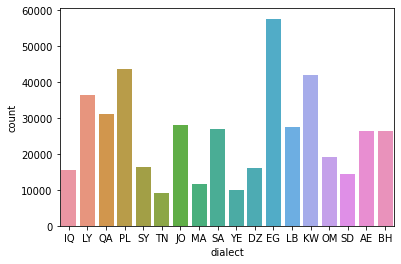

In [6]:
types = df.dialect
ax=sns.countplot(types,data = df ,label='Count')

In [7]:
types = df['dialect'].value_counts()[:18]
a = pd.DataFrame(types)
a

,dialect
EG,57636
PL,43742
KW,42109
LY,36499
QA,31069
JO,27921
LB,27617
SA,26832
AE,26296
BH,26292


> Missing Data

In [8]:
df.isnull().sum()

text       0
dialect    0
dtype: int64

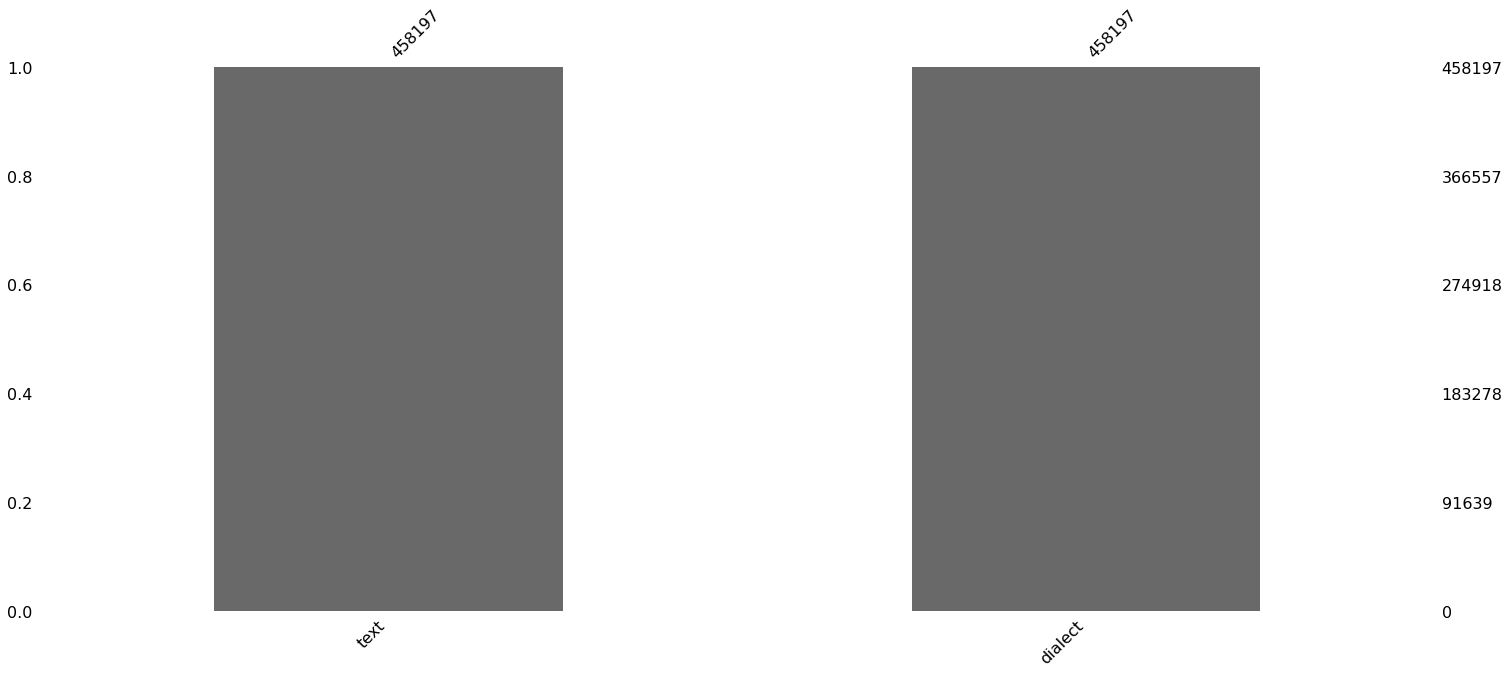

In [16]:
msno.bar(df)


> Clean The Data
  1. Remove Stopwords
  2. Remove Punctuations
  3. Removing URLs
  4. Removing Stop words
  5. Remove White spaces
  6. Removal of emojis
  7. Remove_repeating_char
  8. Removal of HTML tags
  9. Most Mommon Words

In [9]:
# Stopwords
len(stp.classed_stopwords_list())

507

In [10]:
stp.classed_stopwords_list()

dict_keys(['حم', 'غداة', 'جنوب', 'ذواتا', 'حي', 'لازلنا', 'زمان', 'عوض', 'بنا', 'أجمع', 'ؤ', 'إيه', 'لدن', 'ها', 'ش', 'غرب', 'لازلتم', 'هج', 'هب', 'عسى', 'ل', 'آنفا', 'لازلتن', 'هن', 'هم', 'هل', 'هاؤم', 'ارتد', 'هي', 'هو', 'لازالتا', 'تلكما', 'وقت', 'أولئكم', 'نحو', 'حسب', 'نحن', 'لئن', 'اللذين', 'أب', 'أخ', 'قبل', 'بدون', 'مادامتا', 'بئس', 'د', 'ذا', 'لعمر', 'هاهنا', 'كما', 'لستم', 'لستن', 'حتى', 'لدى', 'ذه', 'ذي', 'ذو', 'أي', 'أو', 'أف', 'أن', 'أم', 'نعما', 'هيت', 'هيا', 'مابرح', 'حينما', 'هلا', 'إنما', 'جعل', 'كخ', 'ت', 'عما', 'بكن', 'بكم', 'مازلنا', 'غ', 'رويدك', 'دون', 'أولئك', 'كي', 'هؤلاء', 'لها', 'ي', 'مكانكما', 'كم', 'كل', 'مافتئتن', 'ماانفككتما', 'لعل', 'إنا', 'لازال', 'متى', 'مابرحوا', 'خلال', 'مازلتن', 'مازلتم', 'ثنا', 'راح', 'هلم', 'لولا', 'مابرحتما', 'مافتئت', 'مافتئتم', 'تان', 'مرة', 'أصلا', 'وشكان', 'كأنما', 'إياهما', 'أسفل', 'ص', 'أمامك', 'م', 'مادمتما', 'إياهم', 'ماانفكوا', 'استحال', 'إليك', 'أمسى', 'انبرى', 'مافتئتا', 'أنتم', 'لازالوا', 'أنتن', 'ليستا', 'ماانفككن', '

In [11]:
def clean_text(tweet):
    # Remove Stopwords
    STOPWORDS = stp.classed_STOPWORDS 
    #remove links and mentions
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet) 
    tweet = re.sub('@[^\s]+','',tweet)   
    #remove  digits and Punctuations
    tweet = re.sub('\@|\)|\(|\.|\d|\!|\#|\$|\[|\]|\%|\&|\*|\~|\,|\;|\،|\'|\"|\,|\+|\-|\:|\<|\>|\=|\?|\؟|\_|\|','',tweet)  
    #remove english words
    tweet = re.sub(r"[a-zA-Z]", '', tweet)
    #remove emoji
    tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet) 
    tweet = word_tokenize(tweet)
    tweet = " ".join(word for word in tweet if word not in STOPWORDS)
    return tweet

In [12]:
df['text'] = df['text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if sys.path[0] == '':


In [13]:
# https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [14]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [15]:
df['text'] = df['text'].apply(remove_emoticons)

In [17]:
def normalizeArabic_and_remove_repeating_char(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text

In [18]:
df['text'] = df['text'].apply(normalizeArabic_and_remove_repeating_char)

In [19]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(25)

[('الي', 78808),
 ('اله', 49879),
 ('يا', 43646),
 ('انا', 31080),
 ('مش', 30748),
 ('ولا', 27007),
 ('واله', 24720),
 ('ه', 21117),
 ('شي', 19453),
 ('انت', 17176),
 ('ان', 16096),
 ('يعني', 13827),
 ('فيه', 13339),
 ('عشان', 13333),
 ('الناس', 13265),
 ('واحد', 12243),
 ('مو', 11910),
 ('علي', 11682),
 ('اذا', 11422),
 ('او', 11312),
 ('انه', 11096),
 ('اي', 10948),
 ('ده', 10522),
 ('فيها', 9770),
 ('يوم', 9764)]

Text(0.5, 1.0, 'Common Words Found in Tweets (Without Stop)')

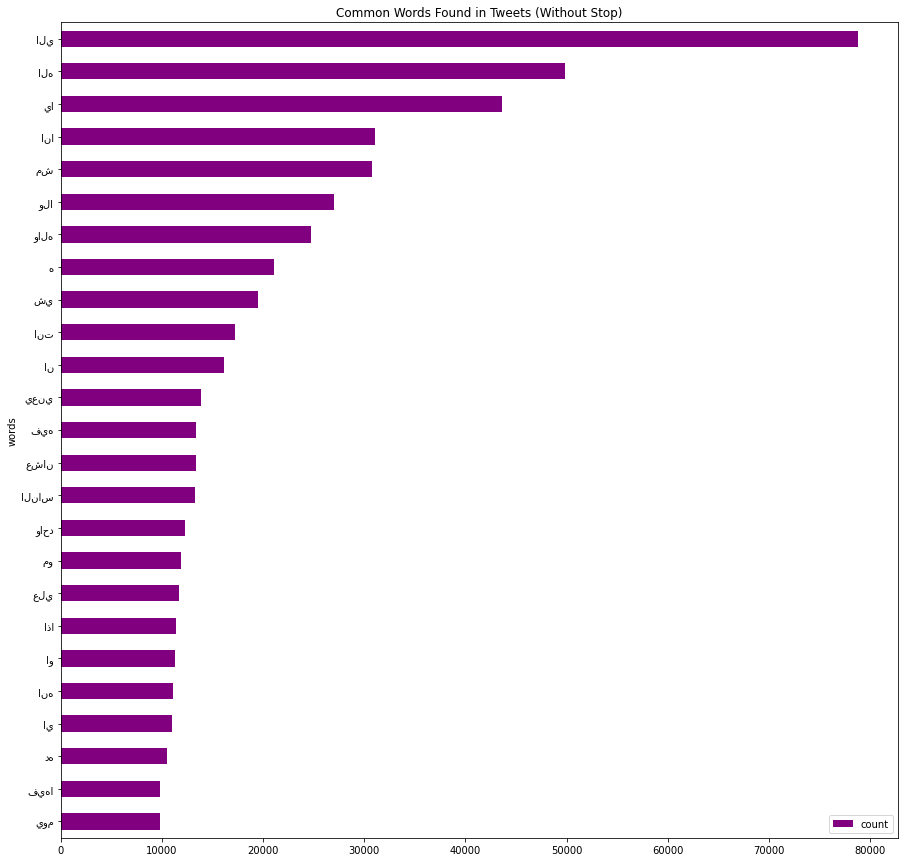

In [20]:
clean_tweets_nsw = pd.DataFrame(cnt.most_common(25),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop)")

In [21]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(25)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text"] = df["text"].apply(lambda text: remove_freqwords(text))

In [22]:
def arabic(text):
  text = tokenize(text, conditions=is_arabicrange, morphs=[strip_tashkeel,strip_tatweel])
  return text

In [23]:
df['text'] = df['text'].apply(arabic)

In [24]:
df

,text,dialect
0,"[بالنهاية, ينتفض, يغير]",IQ
1,"[محسوب, البشر, حيونه, وحشيه, وتطلبون, الغرب, ي...",IQ
2,"[مبين, كلامه, خليجي]",IQ
3,"[يسلملي, مرورك, وروحك, الحلوه]",IQ
4,"[وين, الغيبه, اخ, محمد]",IQ
...,...,...
192,"[مبسوطين, منك, باسطانا]",BH
193,"[ماينده, ابش, يختي]",BH
194,"[شو, عملنا, حنا, تهربي, منا, احنا, مساكين, ليش...",BH
195,"[يبارك, وبالعافيه]",BH


In [25]:
def Detokenizer(text):
    text = TreebankWordDetokenizer().detokenize(text)
    return text

In [26]:
df['text'] = df['text'].apply(Detokenizer)

In [27]:
df

,text,dialect
0,بالنهاية ينتفض يغير,IQ
1,محسوب البشر حيونه وحشيه وتطلبون الغرب يحترمكم ...,IQ
2,مبين كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه,IQ
4,وين الغيبه اخ محمد,IQ
...,...,...
192,مبسوطين منك باسطانا,BH
193,ماينده ابش يختي,BH
194,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,BH
195,يبارك وبالعافيه,BH


In [31]:
embedding_dim = 64
vocab_size = 366557
max_length = 10000
oov_tok = '<OOV>' #  Out of Vocabulary

In [32]:
from sklearn.model_selection import train_test_split
train_articles , validation_articles , train_labels , validation_labels  = train_test_split(df['text'],df['dialect'],test_size = 0.2,random_state=22)

In [33]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(validation_articles))
print('validation_labels', len(validation_labels))

train_articles 366557
train_labels 366557
validation_articles 91640
validation_labels 91640


In [34]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [35]:
word_index

{'<OOV>': 1,
 'شو': 2,
 'دي': 3,
 'وين': 4,
 'ليش': 5,
 'عليه': 6,
 'احنا': 7,
 'الا': 8,
 'لازم': 9,
 'حد': 10,
 'ناس': 11,
 'ايه': 12,
 'وانا': 13,
 'يارب': 14,
 'اني': 15,
 'زي': 16,
 'اليوم': 17,
 'مكن': 18,
 'ربي': 19,
 'كنت': 20,
 'انك': 21,
 'في': 22,
 'عم': 23,
 'شاء': 24,
 'انو': 25,
 'مين': 26,
 'يكون': 27,
 'خير': 28,
 'انتي': 29,
 'صح': 30,
 'عندي': 31,
 'اول': 32,
 'هيك': 33,
 'وانت': 34,
 'شنو': 35,
 'طيب': 36,
 'لان': 37,
 'كتير': 38,
 'ليه': 39,
 'قال': 40,
 'فيك': 41,
 'ربنا': 42,
 'والي': 43,
 'اكيد': 44,
 'مصر': 45,
 'رح': 46,
 'ال': 47,
 'كمان': 48,
 'عادي': 49,
 'وما': 50,
 'حق': 51,
 'وش': 52,
 'دا': 53,
 'عليها': 54,
 'يقول': 55,
 'كله': 56,
 'كده': 57,
 'باله': 58,
 'كانت': 59,
 'عليهم': 60,
 'قطر': 61,
 'اصلا': 62,
 'احلي': 63,
 'حاجة': 64,
 'بقي': 65,
 'اكثر': 66,
 'عندك': 67,
 'الحين': 68,
 'علينا': 69,
 'عنده': 70,
 'عندنا': 71,
 'الف': 72,
 'منه': 73,
 'احسن': 74,
 'يمكن': 75,
 'كلها': 76,
 'تكون': 77,
 'علشان': 78,
 'قلبي': 79,
 'حدا': 80,
 'كلام': 81,
 'ل

In [36]:
tokenizer.texts_to_sequences(['وفي نفس الوقت ما يقعد ساكت ويغض البظر ولا كأنه في شي غلط قاعد يصي'])

[[172,
  15932,
  180,
  722,
  1320,
  1698,
  138823,
  230732,
  6689,
  1,
  22,
  4363,
  142,
  124,
  1]]

In [37]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
len(train_sequences)

366557

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length,)

In [ ]:
len(train_padded),len(train_padded[0])

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

In [ ]:
set(df['dialect'])

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df['dialect'])

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim ))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = embedding_dim))
model.add(Dropout(0.2))
model.add(Dense(19,activation='softmax'))
model.summary()

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
txt = ["MahmoudWaked7 @maganenoo في طريق مطروح مركز بهيج والمركز الي الي جمبه اسمه ايه."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
	
labels = ['EG', 'PL', 'KW', 'LY', 'QA','JO','LB','SA','AE','BH','OM','SY','DZ','IQ','SD','MA','YE','TN'] 

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])